##  Diagnostics for Parental Engagement
To assess the impact of parental engagement on academic performance, we can use parental engagement metrics such as Engagement in School Activities and correlate them with student academic outcomes like total scores, attendance, and even behavioral incidents.

Steps for Analysis:

1. Group students based on their parent's engagement level (High, Medium, Low).
2. Calculate the average academic score and attendance for each engagement category.
3. Create visualizations to show the distribution of student performance across engagement categories.
4. Use diagnostic statistics (e.g., correlation analysis) to identify if there's a significant relationship.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the parental engagement data
parents_df = pd.read_csv("../DataGeneration/parents_bio_data.csv")
students_df = pd.read_csv("../DataGeneration/students_bio_data.csv")
academic_df= pd.read_csv("../DataGeneration/academic_history_data.csv")



In [23]:
parents_df.head()

,Parent ID,LASRRA ID,Student ID,First Name,Last Name,Gender,State of Origin,Title,Age,Date of Birth,Email,Phone Number,Home Address,Occupation,Financial Status,Education Level,Engagement in School Activities,LGA of residence
0,PAR001,3058755736454904720,STU573,Amomot,Arinze,Male,Plateau,Chief,53,1971-02-19,amomot.arinze@gmail.com,2347066629388,"63, Avenue in Lagos Mainland, Lagos State",Farmer,Low Income,Primary,High,Shomolu
1,PAR002,2833953597603037606,STU214,Sunday,Ogundele,Female,Kaduna,Prof.,49,1975-10-09,sunday.ogundele@gmail.com,2347010872248,"79, Road in Alimosho, Lagos State",Teacher,High Income,Secondary,Medium,Agege
2,PAR002,2833953597603037606,STU548,Sunday,Ogundele,Female,Borno,Mrs.,49,1975-06-04,sunday.ogundele@gmail.com,2347022448136,"79, Road in Alimosho, Lagos State",Medical Professional,Low Income,Secondary,Medium,Agege
3,PAR003,2151318126898855557,STU344,Sodiq,Onyeka,Female,Benue,Chief,31,1993-05-27,sodiq.onyeka@gmail.com,2347094374605,"27, Road in Apapa, Lagos State",Business,Middle Income,Tertiary,High,Ajeromi-Ifelodun
4,PAR003,2151318126898855557,STU240,Sodiq,Onyeka,Male,Kwara,Mrs.,31,1993-05-03,sodiq.onyeka@gmail.com,2347041244663,"27, Road in Apapa, Lagos State",Farmer,Middle Income,Secondary,Medium,Ajeromi-Ifelodun


In [24]:
# Merge parental engagement data with academic performance data
merged_parental_df = pd.merge(students_df[['Student ID']], parents_df[['Parent ID', 'Engagement in School Activities','Student ID']], on='Student ID')
merged_parental_academic_df = pd.merge(academic_df, merged_parental_df[['Student ID', 'Engagement in School Activities']], on='Student ID')

In [25]:

# Calculate average scores and attendance by parental engagement
parental_engagement_performance = merged_parental_academic_df.groupby('Engagement in School Activities').agg(
    Average_Score=('Total Score', 'mean'),
    Average_Attendance=('Attendance', 'mean')
).reset_index()


# Display the results
print("Impact of Parental Engagement on Academic Performance")
print(parental_engagement_performance)

Impact of Parental Engagement on Academic Performance
  Engagement in School Activities  Average_Score  Average_Attendance
0                            High      72.455316           85.001605
1                             Low      72.563248           84.946925
2                          Medium      72.547058           85.046329


C:\Users\JOHNKENNEDY\AppData\Local\Temp\ipykernel_25828\1019126012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engagement in School Activities', y='Average_Score', data=parental_engagement_performance, palette='coolwarm')
C:\Users\JOHNKENNEDY\AppData\Local\Temp\ipykernel_25828\1019126012.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engagement in School Activities', y='Average_Attendance', data=parental_engagement_performance, palette='coolwarm')


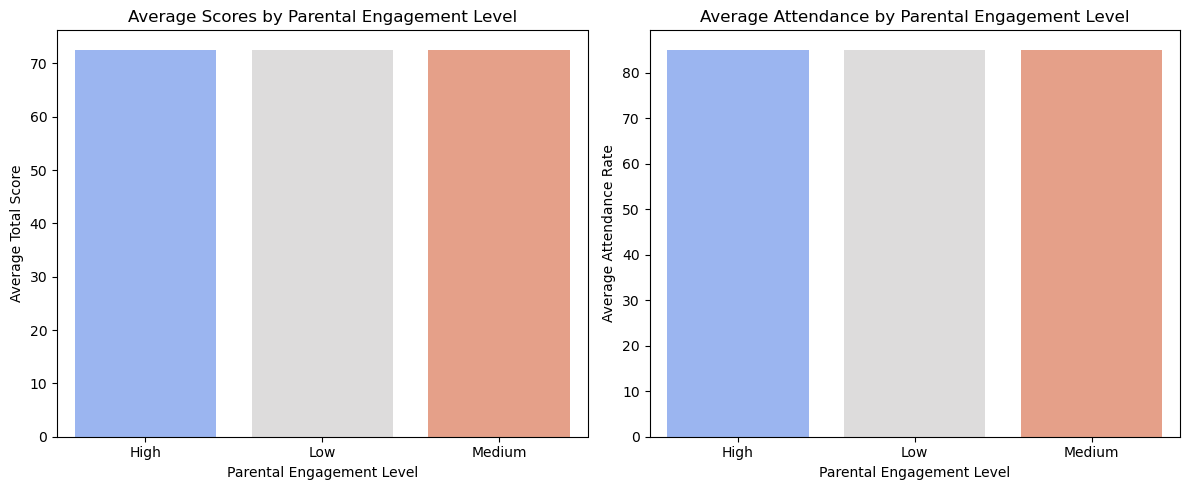

In [26]:
# Visualize the relationship between parental engagement and academic performance
plt.figure(figsize=(12, 5))

# Plot average scores by parental engagement level
plt.subplot(1, 2, 1)
sns.barplot(x='Engagement in School Activities', y='Average_Score', data=parental_engagement_performance, palette='coolwarm')
plt.title('Average Scores by Parental Engagement Level')
plt.xlabel('Parental Engagement Level')
plt.ylabel('Average Total Score')

# Plot average attendance by parental engagement level
plt.subplot(1, 2, 2)
sns.barplot(x='Engagement in School Activities', y='Average_Attendance', data=parental_engagement_performance, palette='coolwarm')
plt.title('Average Attendance by Parental Engagement Level')
plt.xlabel('Parental Engagement Level')
plt.ylabel('Average Attendance Rate')

plt.tight_layout()
plt.show()


In [27]:

# Calculate the correlation between parental engagement and academic performance
engagement_correlation = merged_parental_academic_df[['Engagement in School Activities', 'Total Score', 'Attendance']].corr()
print("Correlation Matrix for Parental Engagement and Performance")
print(engagement_correlation)


Correlation Matrix for Parental Engagement and Performance
             Total Score  Attendance
Total Score     1.000000   -0.003793
Attendance     -0.003793    1.000000


C:\Users\JOHNKENNEDY\AppData\Local\Temp\ipykernel_25828\1741913248.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  engagement_correlation = merged_parental_academic_df[['Engagement in School Activities', 'Total Score', 'Attendance']].corr()
